In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import scipy
from scipy.stats import skewnorm

In [2]:
df = pg.read_dataset("chi2_independence")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.isnull().sum()

In [5]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
df.iloc[[163, 164, 165]]

In [10]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

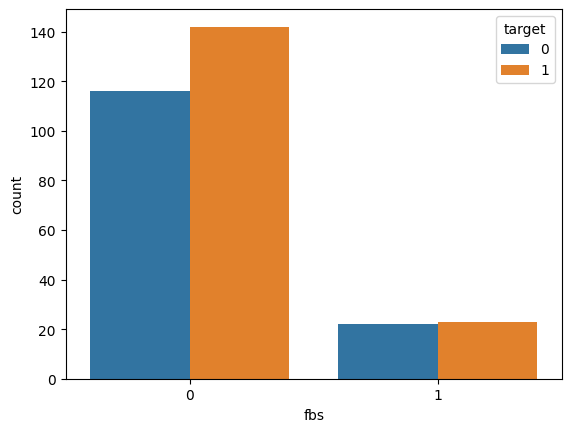

In [14]:
sns.countplot(data=df, x="fbs", hue="target")
plt.show()

In [16]:
expected, observed, stats = pg.chi2_independence(data=df, x="fbs", y="target")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.106273,1.0,0.744428,0.018728,0.062261
1,cressie-read,0.666667,0.106201,1.0,0.744511,0.018722,0.062253
2,log-likelihood,0.000000,0.106069,1.0,0.744664,0.018710,0.062237
3,freeman-tukey,-0.500000,0.105979,1.0,0.744769,0.018702,0.062227
4,mod-log-likelihood,-1.000000,0.105897,1.0,0.744865,0.018695,0.062217
5,neyman,-2.000000,0.105755,1.0,0.745030,0.018682,0.062201


In [18]:
stats.query("test == 'pearson'")["pval"]

0    0.744428
Name: pval, dtype: float64

We ask ourselves, is sex a good predictor for the target (heart disease)?
Is there any significant association between them?

null hypothesis: there is no significant relation between sex and target
alternative hypothesis: there is a significant relation between sex and target

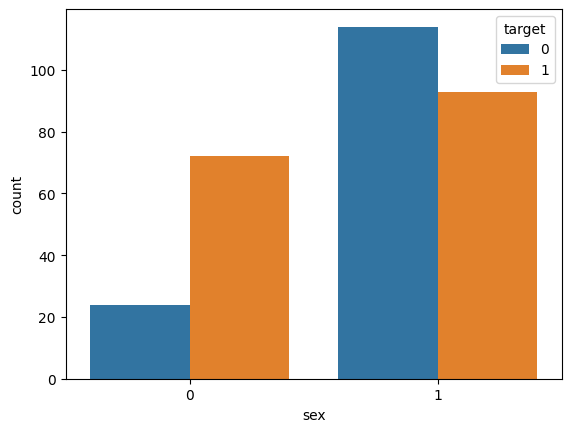

In [26]:
sns.countplot(data=df, x="sex", hue="target")
plt.show()

In [23]:
expected, obeserved, stats = pg.chi2_independence(data= df, x="sex", y="target")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,22.717227,1.0,1.876778e-06,0.273814,0.997494
1,cressie-read,0.666667,22.931427,1.0,1.678845e-06,0.275102,0.997663
2,log-likelihood,0.000000,23.557374,1.0,1.212439e-06,0.278832,0.998096
3,freeman-tukey,-0.500000,24.219622,1.0,8.595211e-07,0.282724,0.998469
4,mod-log-likelihood,-1.000000,25.071078,1.0,5.525544e-07,0.287651,0.998845
5,neyman,-2.000000,27.457956,1.0,1.605471e-07,0.301032,0.999481


In [25]:
stats.query("test == 'pearson'")["pval"]

0    0.000002
Name: pval, dtype: float64

Let's assume we'd the alpha as 0.05. Stats indicate that 0.00 is less than 0.05. So we can reject the null hypothesis. This means that sex does impact target. 

**sex predicts target**